In [1]:
import longi_class as lc
import analysis_functions as af


In [2]:
names = af.assemble_names('/home/dprotter/Documents/Vole Projects/large_operant_test_csv/summaries')
sum_files = [file for file in sorted(names) if not 'round' in file]

In [3]:
test_analysis = lc.LongitudinalAnalysis('all_exp')
for f in sum_files:
    test_analysis.add_summary_csv(f)

l/lib/python3.8/site-packages/pandas/core/internals/blocks.py", line 590, in astype
    values = astype_nansafe(vals1d, dtype, copy=True)
  File "/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/dtypes/cast.py", line 966, in astype_nansafe
    return lib.astype_intsafe(arr.ravel(), dtype).reshape(arr.shape)
  File "pandas/_libs/lib.pyx", line 617, in pandas._libs.lib.astype_intsafe
ValueError: invalid literal for int() with base 10: '1.0'
/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
Traceback (most recent call last):
  File "/home/dprotter/Documents/Vole Projects/Operant_Daily_Pipeline/longi_class.py", line 61, in add_summary_csv
    metric.add_data(new_row)
  File "/home/dprotter/Documents/Vole Projects/Operant_Daily_Pipeline/longi_class.py", line 156, in add_data
    self.data = sel

In [4]:
mets = test_analysis.metrics
for met in mets.keys():
    print('************************')
    print(met)
    print(mets[met].data)
    print('\n\n')

  0.370370   Door_test   
18  3996.0    5  0.392857   Door_test   
20  3996.0    6  0.458333   Door_test   

                                                 file  
0   /home/dprotter/Documents/Vole Projects/large_o...  
3   /home/dprotter/Documents/Vole Projects/large_o...  
6   /home/dprotter/Documents/Vole Projects/large_o...  
7   /home/dprotter/Documents/Vole Projects/large_o...  
9   /home/dprotter/Documents/Vole Projects/large_o...  
11  /home/dprotter/Documents/Vole Projects/large_o...  
13  /home/dprotter/Documents/Vole Projects/large_o...  
15  /home/dprotter/Documents/Vole Projects/large_o...  
17  /home/dprotter/Documents/Vole Projects/large_o...  
19  /home/dprotter/Documents/Vole Projects/large_o...  
2   /home/dprotter/Documents/Vole Projects/large_o...  
4   /home/dprotter/Documents/Vole Projects/large_o...  
5   /home/dprotter/Documents/Vole Projects/large_o...  
8   /home/dprotter/Documents/Vole Projects/large_o...  
10  /home/dprotter/Documents/Vole Projects/large_o.

In [5]:
mets['percent_food_presses'].data

,animal,day,value,experiment,file
8,3986.0,1.0,0.15,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
11,3986.0,2.0,0.5,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
12,3986.0,3.0,0.4,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
4,3986.0,4.0,0.55,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
0,3986.0,1.0,0,Magazine,/home/dprotter/Documents/Vole Projects/large_o...
2,3986.0,2.0,0,Magazine,/home/dprotter/Documents/Vole Projects/large_o...
6,3986.0,3.0,0,Magazine,/home/dprotter/Documents/Vole Projects/large_o...
9,3996.0,1.0,0.95,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
10,3996.0,2.0,0.95,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
13,3996.0,3.0,0.4,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...


In [6]:
mets['percent_food_presses'].sort_data()
mets['percent_food_presses'].data

,animal,day,value,experiment,file
8,3986.0,1.0,0.15,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
11,3986.0,2.0,0.5,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
12,3986.0,3.0,0.4,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
14,3986.0,3.0,1.0,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
4,3986.0,4.0,0.55,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
0,3986.0,1.0,0,Magazine,/home/dprotter/Documents/Vole Projects/large_o...
2,3986.0,2.0,0,Magazine,/home/dprotter/Documents/Vole Projects/large_o...
6,3986.0,3.0,0,Magazine,/home/dprotter/Documents/Vole Projects/large_o...
9,3996.0,1.0,0.95,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
10,3996.0,2.0,0.95,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...


In [7]:
met = mets['percent_food_presses'].data
d8 = met.loc[(met.animal == '3986.0')&(met.experiment == 'Autoshape'), 'day'].values
d9 = met.loc[(met.animal == '3996.0')&(met.experiment == 'Autoshape'), 'day'].values

p8 = met.loc[(met.animal == '3986.0')&(met.experiment == 'Autoshape'), 'value'].values
p9 = met.loc[(met.animal == '3996.0')&(met.experiment == 'Autoshape'), 'value'].values

In [8]:
import numpy as np
both = np.append([p8],[p9], axis = 0)

In [9]:
both[0,2] = 1.0
both = both.astype(float)

[Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0')]

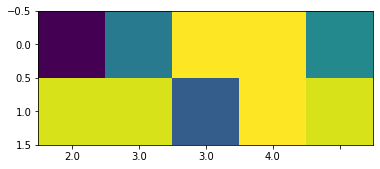

In [17]:
import matplotlib.pyplot as plt
import matplotlib
fig, ax = plt.subplots()

ax.imshow(both)
ax.set_xticklabels(d8)


In [18]:
both

array([[0.15, 0.5 , 1.  , 1.  , 0.55],
       [0.95, 0.95, 0.4 , 1.  , 0.95]])

In [19]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for key, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.3f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

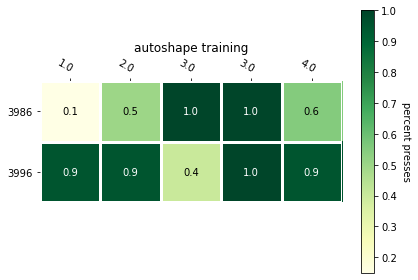

In [20]:
fig, ax = plt.subplots()

im, cbar = heatmap(both, ['3986', '3996'], d8, ax=ax,
                   cmap="YlGn", cbarlabel="percent presses")
texts = annotate_heatmap(im, valfmt="{x:.1f}")
ax.set_title('autoshape training')
fig.tight_layout()
plt.show()

In [21]:
met = mets['percent_food_presses'].data
d8 = met.loc[(met.animal == '3986.0')&(met.experiment == 'Autoshape'), 'day'].values
d9 = met.loc[(met.animal == '3996.0')&(met.experiment == 'Autoshape'), 'day'].values

p8 = met.loc[(met.animal == '3986.0')&(met.experiment == 'Autoshape'), 'value'].values
p9 = met.loc[(met.animal == '3996.0')&(met.experiment == 'Autoshape'), 'value'].values

In [22]:
met = mets['percent_food_presses'].data
met

,animal,day,value,experiment,file
8,3986.0,1.0,0.15,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
11,3986.0,2.0,0.5,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
12,3986.0,3.0,0.4,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
14,3986.0,3.0,1.0,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
4,3986.0,4.0,0.55,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
0,3986.0,1.0,0,Magazine,/home/dprotter/Documents/Vole Projects/large_o...
2,3986.0,2.0,0,Magazine,/home/dprotter/Documents/Vole Projects/large_o...
6,3986.0,3.0,0,Magazine,/home/dprotter/Documents/Vole Projects/large_o...
9,3996.0,1.0,0.95,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...
10,3996.0,2.0,0.95,Autoshape,/home/dprotter/Documents/Vole Projects/large_o...


In [23]:
import matplotlib.colors as mcolors
#shamelessly copied from https://towardsdatascience.com/beautiful-custom-colormaps-with-matplotlib-5bab3d1f0e72

def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]


def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [24]:
def get_data(metric: str, experiment: str, dataset):
    if not metric in dataset.metrics:
        print(f'metric: {metric} not found in dataset')
    
    met = mets[metric].data
    data = met.loc[met.experiment == experiment]
    anis = sorted(data.animal.unique() )
    days = sorted(data.day.unique() )

    out = np.empty((len(anis), len(days)))
    out[:,:] = np.nan

    for i, ani in enumerate(anis):

        ani_slice = data.loc[data.animal == ani]
        for d in ani_slice.day.unique():
            val = ani_slice.loc[ani_slice.day == d, 'value'].values[0]
            
            out[i,int(d-1)] = val
    
    return anis, days, out

def make_heatmap(data, animals, days, title: str = 'no title', 
                cmap = 'YlGn', cbarlabel: str = 'no label', ax = None,
                val_floor: float = 0, val_ceil: float = 1.0):
    if not ax:
        fig, ax = plt.subplots()

    im, cbar = heatmap(data, animals, days, ax=ax,
                    cmap=cmap, cbarlabel=cbarlabel, vmin = val_floor,
                    vmax = val_ceil)
    texts = annotate_heatmap(im, valfmt="{x:.2f}", threshold = val_ceil/2)
    ax.set_title(title)
    
    return ax
    

In [25]:
ani, days, vals = get_data('percent_food_presses', experiment = 'Autoshape', dataset = test_analysis)

In [26]:
mets

{'rounds': <longi_class.Metric at 0x7f3de8408b80>,
 'total_lever_press': <longi_class.Metric at 0x7f3dbd9acfa0>,
 'non_press_rounds': <longi_class.Metric at 0x7f3dbd9acaf0>,
 'prop_non_presses_by_rounds': <longi_class.Metric at 0x7f3dbd9ac610>,
 'percent_food_presses': <longi_class.Metric at 0x7f3dbd9acee0>,
 'mean_pellet_latency': <longi_class.Metric at 0x7f3dbd72e430>,
 'num_pellet_retrieved': <longi_class.Metric at 0x7f3dbd72e400>,
 'proportion_round_pellet_retrieved': <longi_class.Metric at 0x7f3dbd72e490>,
 'proportion_pellet_retrieved': <longi_class.Metric at 0x7f3dbd72e5b0>,
 'animal_ID': <longi_class.Metric at 0x7f3dbd72e640>,
 'day': <longi_class.Metric at 0x7f3dbd72e910>,
 'experiment': <longi_class.Metric at 0x7f3dbd72e970>,
 'date': <longi_class.Metric at 0x7f3dbd72edc0>,
 'prop_presses_by_rounds': <longi_class.Metric at 0x7f3de8c77c40>,
 'mean_food_lever_press_latency': <longi_class.Metric at 0x7f3de840fd60>,
 'door_1_lever_press_count': <longi_class.Metric at 0x7f3dbd9ac2

Text(0.5, 1.05, 'Autoshape')

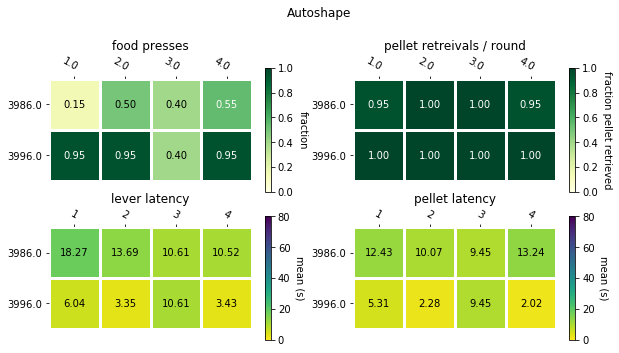

In [34]:

metric = 'percent_food_presses'
experiment = 'Autoshape'

fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (10,5)) 


ani, days, vals = get_data(metric, experiment = experiment, dataset = test_analysis)
ax = make_heatmap(vals, ani, days, title = 'food presses', cbarlabel = 'fraction', ax = axs[0,0])

metric = 'proportion_round_pellet_retrieved'
ani, days, vals = get_data(metric, experiment = experiment, dataset = test_analysis)
ax = make_heatmap(vals, ani, days, title = 'pellet retreivals / round', cbarlabel = 'fraction pellet retrieved', ax = axs[0,1])

cmap_r = plt.cm.get_cmap('viridis').reversed()
metric = 'mean_food_lever_press_latency'
ani, days, vals = get_data(metric, experiment = experiment, dataset = test_analysis)
ax = make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'mean (s)', ax = axs[1,0], 
                    cmap = cmap_r, val_ceil = 80, val_floor = 0)


metric = 'mean_pellet_latency'
ani, days, vals = get_data(metric, experiment = experiment, dataset = test_analysis)
ax = make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'mean (s)', ax = axs[1,1], 
                    cmap = cmap_r, val_ceil = 80, val_floor = 0)
fig.suptitle(experiment, y = 1.05)

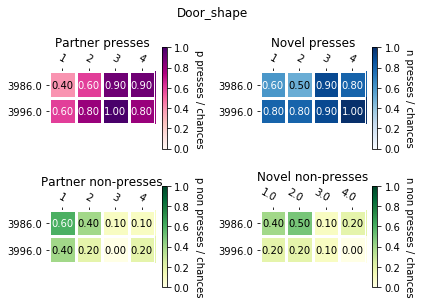

In [34]:

metric = 'door_1_lever_press_round_proportion'
experiment = 'Door_shape'

fig, axs = plt.subplots(ncols = 2, nrows = 2)

ani, days, vals = get_data(metric, experiment = experiment, dataset = test_analysis)
a = make_heatmap(vals, ani, days, ax = axs[0,0],
                    title = "Partner presses", 
                    cbarlabel = 'p presses / chances',
                    cmap = 'RdPu')

metric = 'door_2_lever_press_round_proportion'
experiment = 'Door_shape'
ani, days, vals = get_data(metric, experiment = experiment, dataset = test_analysis)
a = make_heatmap(vals, ani, days, ax = axs[0,1],
                    title = "Novel presses", 
                    cbarlabel = 'n presses / chances',
                    cmap = 'Blues')

metric = 'door_1_non_press_round_proportion'
experiment = 'Door_shape'
ani, days, vals = get_data(metric, experiment = experiment, dataset = test_analysis)
a = make_heatmap(vals, ani, days, ax = axs[1,0],
                    title = "Partner non-presses", 
                    cbarlabel = 'p non presses / chances',
                    cmap = 'YlGn')

metric = 'door_2_non_press_round_proportion'
experiment = 'Door_shape'
ani, days, vals = get_data(metric, experiment = experiment, dataset = test_analysis)
a = make_heatmap(vals, ani, days, ax = axs[1,1],
                    title = "Novel non-presses", 
                    cbarlabel = 'n non presses / chances',
                    cmap = 'YlGn')

fig.suptitle(experiment, y = 1.05)
fig.tight_layout()

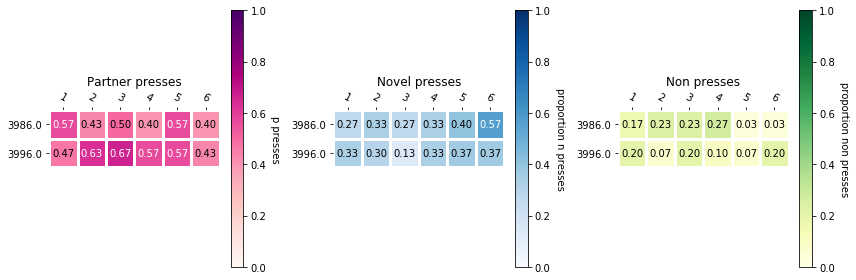

In [35]:
metric = 'door_1_lever_press_round_proportion'
experiment = 'Door_test'

fig, axs = plt.subplots(ncols = 3, figsize = (12,4))

ani, days, vals = get_data(metric, experiment = experiment, dataset = test_analysis)
a = make_heatmap(vals, ani, days, ax = axs[0],
                    title = "Partner presses", 
                    cbarlabel = 'p presses',
                    cmap = 'RdPu', val_floor = 0, val_ceil = 1)

metric = 'door_2_lever_press_round_proportion'
experiment = 'Door_test'
ani, days, vals = get_data(metric, experiment = experiment, dataset = test_analysis)
a = make_heatmap(vals, ani, days, ax = axs[1],
                    title = "Novel presses", 
                    cbarlabel = 'proportion n presses',
                    cmap = 'Blues')

metric = 'prop_non_presses_by_rounds'
experiment = 'Door_test'
ani, days, vals = get_data(metric, experiment = experiment, dataset = test_analysis)
a = make_heatmap(vals, ani, days, ax = axs[2],
                    title = "Non presses", 
                    cbarlabel = 'proportion non presses',
                    cmap = 'YlGn')
fig.tight_layout()

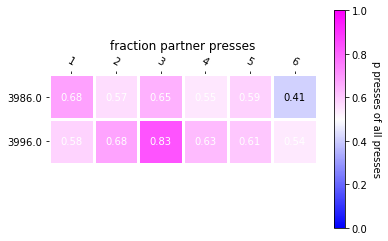

In [36]:
metric = 'door_1_lever_press_total_press_proportion'
experiment = 'Door_test'

cmap = get_continuous_cmap(['#0000FF','#FFFFFF','#ff00ff'])


fig, ax = plt.subplots()

ani, days, vals = get_data(metric, experiment = experiment, dataset = test_analysis)
a = make_heatmap(vals, ani, days, ax = ax,
                    title = "fraction partner presses", 
                    cbarlabel = 'p presses of all presses',
                    cmap = cmap, val_floor = 0, val_ceil = 1)

{'rounds': <longi_class.Metric at 0x7f47e44c5e20>,
 'total_lever_press': <longi_class.Metric at 0x7f47e44c5e80>,
 'non_press_rounds': <longi_class.Metric at 0x7f47e44bec70>,
 'prop_non_presses_by_rounds': <longi_class.Metric at 0x7f47e44cfb80>,
 'percent_food_presses': <longi_class.Metric at 0x7f47b6fef250>,
 'mean_pellet_latency': <longi_class.Metric at 0x7f47b6fef340>,
 'num_pellet_retrieved': <longi_class.Metric at 0x7f47b6fef3d0>,
 'proportion_round_pellet_retrieved': <longi_class.Metric at 0x7f47b6fef550>,
 'animal_ID': <longi_class.Metric at 0x7f47b6fef6d0>,
 'day': <longi_class.Metric at 0x7f47b6fef850>,
 'experiment': <longi_class.Metric at 0x7f47b6fef9d0>,
 'date': <longi_class.Metric at 0x7f47b6fefb50>,
 'prop_presses_by_rounds': <longi_class.Metric at 0x7f47b6e33df0>,
 'mean_food_lever_press_latency': <longi_class.Metric at 0x7f47b6e81130>,
 'door_1_lever_press_count': <longi_class.Metric at 0x7f47e44be910>,
 'door_1_non_press_count': <longi_class.Metric at 0x7f47b6e33c10>,
